In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

%matplotlib inline
df= pd.read_csv('../data/02_intermediate_data/2021-DL-Draft.csv')
colnames = list(df.columns[1:-1])
df.head()

,Player,College,Round,Pick,Team,G,Comb,Solo,Ast,TFL,Sk,Int,FF,FR,PD
0,Jaelan Phillips,Miami (FL),1,18,MIA,21,86,49,37,24,12.5,1,0,0,5
1,Kwity Paye,Michigan,1,21,IND,37,99,56,43,25,11.5,0,1,1,1
2,Payton Turner,Houston,1,28,NOR,39,115,68,47,26,10.0,1,1,0,9
3,Gregory Rousseau,Miami (FL),1,30,BUF,25,75,45,30,15,7.5,0,2,1,4
4,Odafe Oweh,Penn St.,1,31,BAL,32,89,52,37,20,10.5,1,1,0,8


In [11]:
features = ["G", "Comb", "Solo", "Ast", "TFL", "Sk", "Int", "FF", "FR", "PD"]
X = df[features]

# Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)
df["Cluster_Label"] = df["Cluster"].map(
    {0: "Good", 1: "Bad", 2: "Elite"}
)  # Based on center analysis

print(df[["Player", "Cluster"]])
print("\nCluster Centers:")
print(pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features))

                Player  Cluster
0      Jaelan Phillips        2
1           Kwity Paye        0
2        Payton Turner        2
3     Gregory Rousseau        1
4           Odafe Oweh        2
5    Christian Barmore        0
6      Levi Onwuzurike        1
7       Dayo Odeyingbo        0
8        Boogie Basham        2
9         Alim McNeill        1
10     Milton Williams        0
11      Osa Odighizuwa        0
12      Malcolm Koonce        0
13    Chauncey Golston        0
14    Patrick Jones II        0
15          Jay Tufele        1
16      Cameron Sample        2
17      Derrick Barnes        1
18       Elerson Smith        0
19         Bobby Brown        1
20         Chris Rumph        1
21       Tyler Shelvin        1
22        Tommy Togiai        1
23   Janarius Robinson        1
24       Rashad Weaver        0
25      Joshua Kaindoh        1
26      Ta'Quon Graham        0
27  Isaiahh Loudermilk        1
28       Daviyon Nixon        0

Cluster Centers:
           G        Co

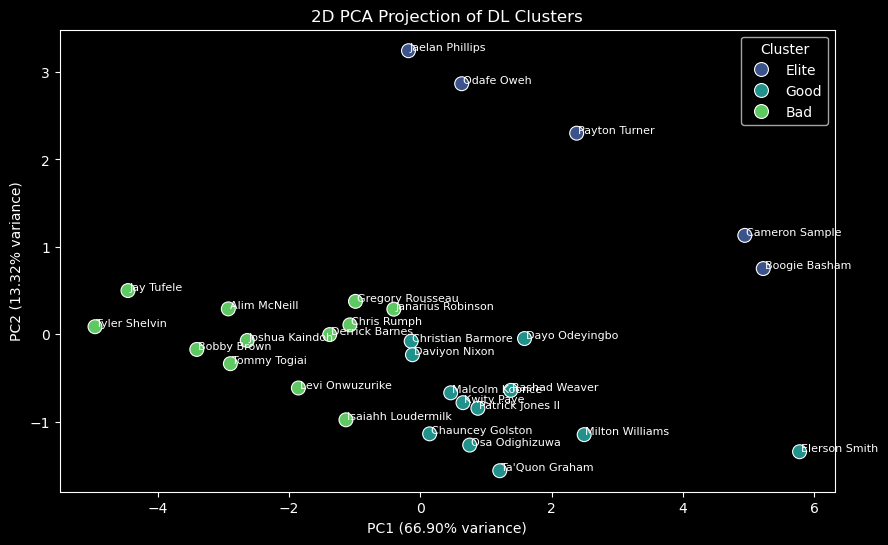

In [12]:
# PCA reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add to DF
df["PC1"] = X_pca[:, 0]
df["PC2"] = X_pca[:, 1]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, x="PC1", y="PC2", hue="Cluster_Label", palette="viridis", s=100
)
for i, row in df.iterrows():
    plt.text(row["PC1"] + 0.02, row["PC2"], row["Player"], fontsize=8)  # Label players
plt.title("2D PCA Projection of DL Clusters")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)")
plt.legend(title="Cluster")
plt.show()

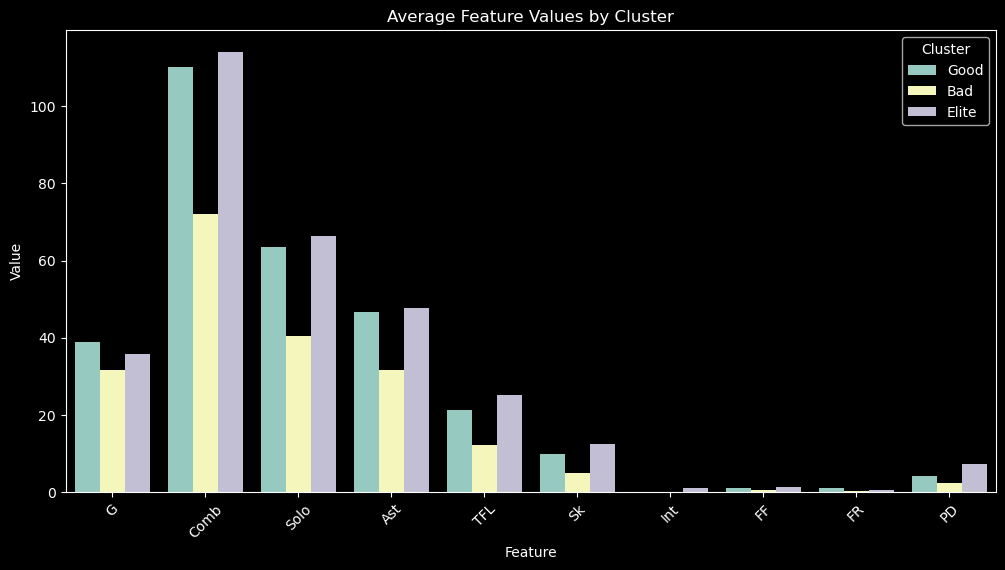

In [13]:
# Get centers (unscaled)
centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_), columns=features
)
centers["Cluster"] = ["Good", "Bad", "Elite"]  # Adjust based on your labels

# Melt for plotting
centers_melt = centers.melt(id_vars="Cluster", var_name="Feature", value_name="Value")

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=centers_melt, x="Feature", y="Value", hue="Cluster")
plt.title("Average Feature Values by Cluster")
plt.xticks(rotation=45)
plt.legend(title="Cluster")
plt.show()

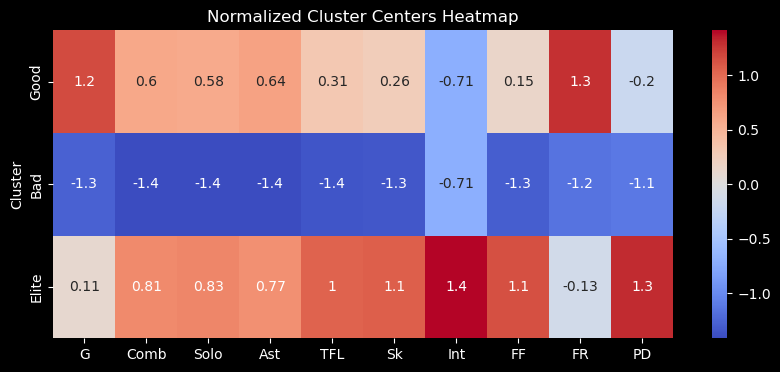

In [14]:
# Normalize centers for heatmap
centers_norm = pd.DataFrame(
    StandardScaler().fit_transform(centers.drop("Cluster", axis=1)),
    columns=features,
    index=centers["Cluster"],
)

# Plot
plt.figure(figsize=(10, 4))
sns.heatmap(centers_norm, annot=True, cmap="coolwarm", center=0)
plt.title("Normalized Cluster Centers Heatmap")
plt.show()